# 12.1 Bar Plot


In [102]:
library(DOSE)
data(geneList)
de <- names(geneList)[abs(geneList) > 2]

In [103]:
packageVersion("DOSE")

[1] ‘3.14.0’

In [104]:
# packageVersion("BiocGenerics")
# packageVersion("AnnotationDbi")
# packageVersion("GSEABase")
# packageVersion("org.Hs.eg.db")
# packageVersion("vroom")
# packageVersion("msigdbr")
# packageVersion("DOSE")
# packageVersion("pathview")
# packageVersion("clusterProfiler")
# packageVersion("clusterProfiler.dplyr")
# packageVersion("enrichplot")


In [105]:
edo <- enrichDGN(de)

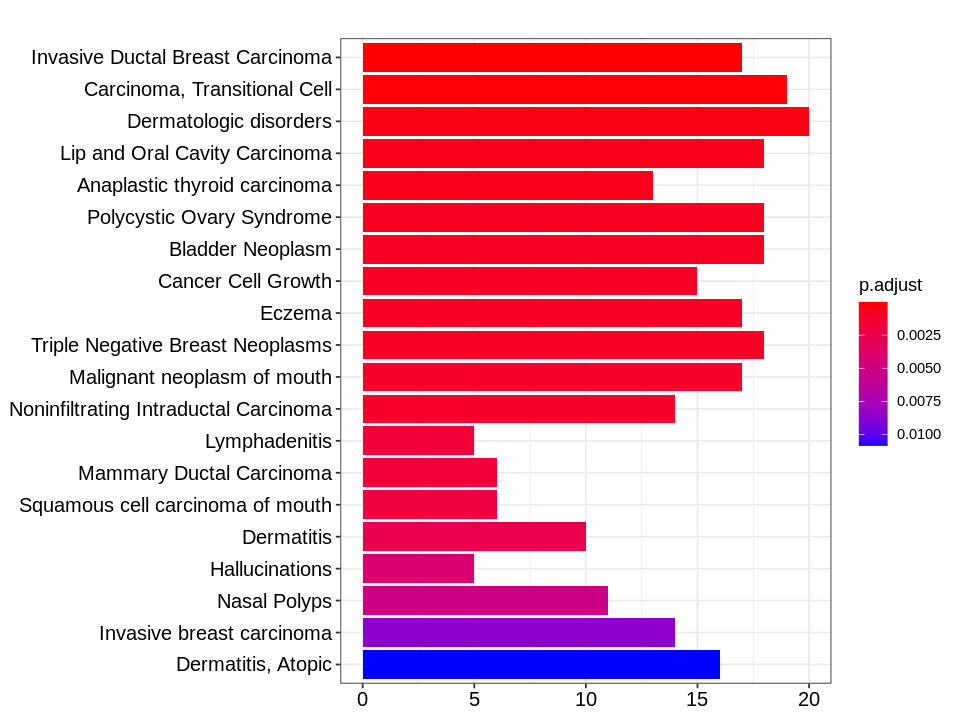

In [106]:
#debug(barplot)
#undebug()
barplot(edo, showCategory=20)

In [107]:
str(geneList)
packageVersion("fgsea")

 Named num [1:12495] 4.57 4.51 4.42 4.14 3.88 ...
 - attr(*, "names")= chr [1:12495] "4312" "8318" "10874" "55143" ...


[1] ‘1.14.0’

# 12.2 Dot plot


In [108]:
edo2 <- gseNCG(geneList, pvalueCutoff = 0.5,  nPerm=10000)

preparing geneSet collections...
GSEA analysis...
Warning message in .GSEA(geneList = geneList, exponent = exponent, minGSSize = minGSSize, :
“We do not recommend using nPerm parameter incurrent and future releases”Warning message in fgsea(pathways = geneSets, stats = geneList, nperm = nPerm, minSize = minGSSize, :
“You are trying to run fgseaSimple. It is recommended to use fgseaMultilevel. To run fgseaMultilevel, you need to remove the nperm argument in the fgsea function call.”leading edge analysis...
done...


In [109]:
head(edo2)

ID                   Description          setSize
liver                liver                liver                 45    
lung                 lung                 lung                 115    
bladder              bladder              bladder               61    
head_and_neck        head_and_neck        head_and_neck         68    
prostate             prostate             prostate              46    
soft_tissue_sarcomas soft_tissue_sarcomas soft_tissue_sarcomas  28    
                     enrichmentScore NES       pvalue     p.adjust  qvalues  
liver                -0.4733762      -1.544067 0.01963967 0.2542848 0.2425743
lung                 -0.3556788      -1.359853 0.03616583 0.2542848 0.2425743
bladder              -0.4134155      -1.426759 0.03908228 0.2542848 0.2425743
head_and_neck        -0.3944769      -1.387918 0.05035074 0.2542848 0.2425743
prostate             -0.4236662      -1.388366 0.06059137 0.2542848 0.2425743
soft_tissue_sarcomas -0.4847068      -1.436618 0.06164384 0.2542848 0.2425743
                     rank leading_edge                  
liver                3138 tags=44%, list=25%, signal=33%
lung                 2775 tags=31%, list=22%, signal=25%
bladder              2841 tags=44%, list=23%, signal=34%
head_and_neck        2864 tags=38%, list=23%, signal=30%
prostate             3170 tags=48%, list=25%, signal=36%
soft_tissue_sarcomas 2277 tags=29%, list=18%, signal=23%
                     core_enrichment                                                                                                                                                                             
liver                7249/472/1571/4297/8289/9611/5925/22861/1499/7157/2186/595/7248/11059/7769/273/1657/29994/213/125                                                                                           
lung                 5287/29072/92552/53353/8019/8289/3624/5925/107/201229/4763/1499/7157/23314/6794/9811/29119/3791/1301/2322/324/23284/2261/4685/22982/187/9353/2042/862/51364/79776/2737/63923/57088/1602/2066
bladder              7403/287/463/472/4297/2065/2262/8289/9611/5925/2068/4763/7157/2186/1387/3910/2261/7248/23037/23345/7832/79633/10628/22906/388/4036/3169                                                     
head_and_neck        9379/5287/79161/8502/5286/80230/8626/5921/3664/113791/7157/55190/9947/5295/7248/4208/1278/7048/221981/89795/23345/79776/9369/55821/2045/64084                                               
prostate             463/472/4297/11280/1105/8405/8289/9611/5925/54894/1499/7157/5295/1027/2078/324/595/10142/2045/7704/367/3169                                                                                 
soft_tissue_sarcomas 5925/4763/1499/7157/5159/2045/3667/2066

In [110]:
p1 <- dotplot(edo, showCategory=30) + ggtitle("dotplot for ORA")

In [111]:
p2 <- dotplot(edo2, showCategory=30) + ggtitle("dotplot for GSEA")

In [112]:
library(repr)

# Change plot size to 4 x 3
options(repr.plot.width=16, repr.plot.height=8)

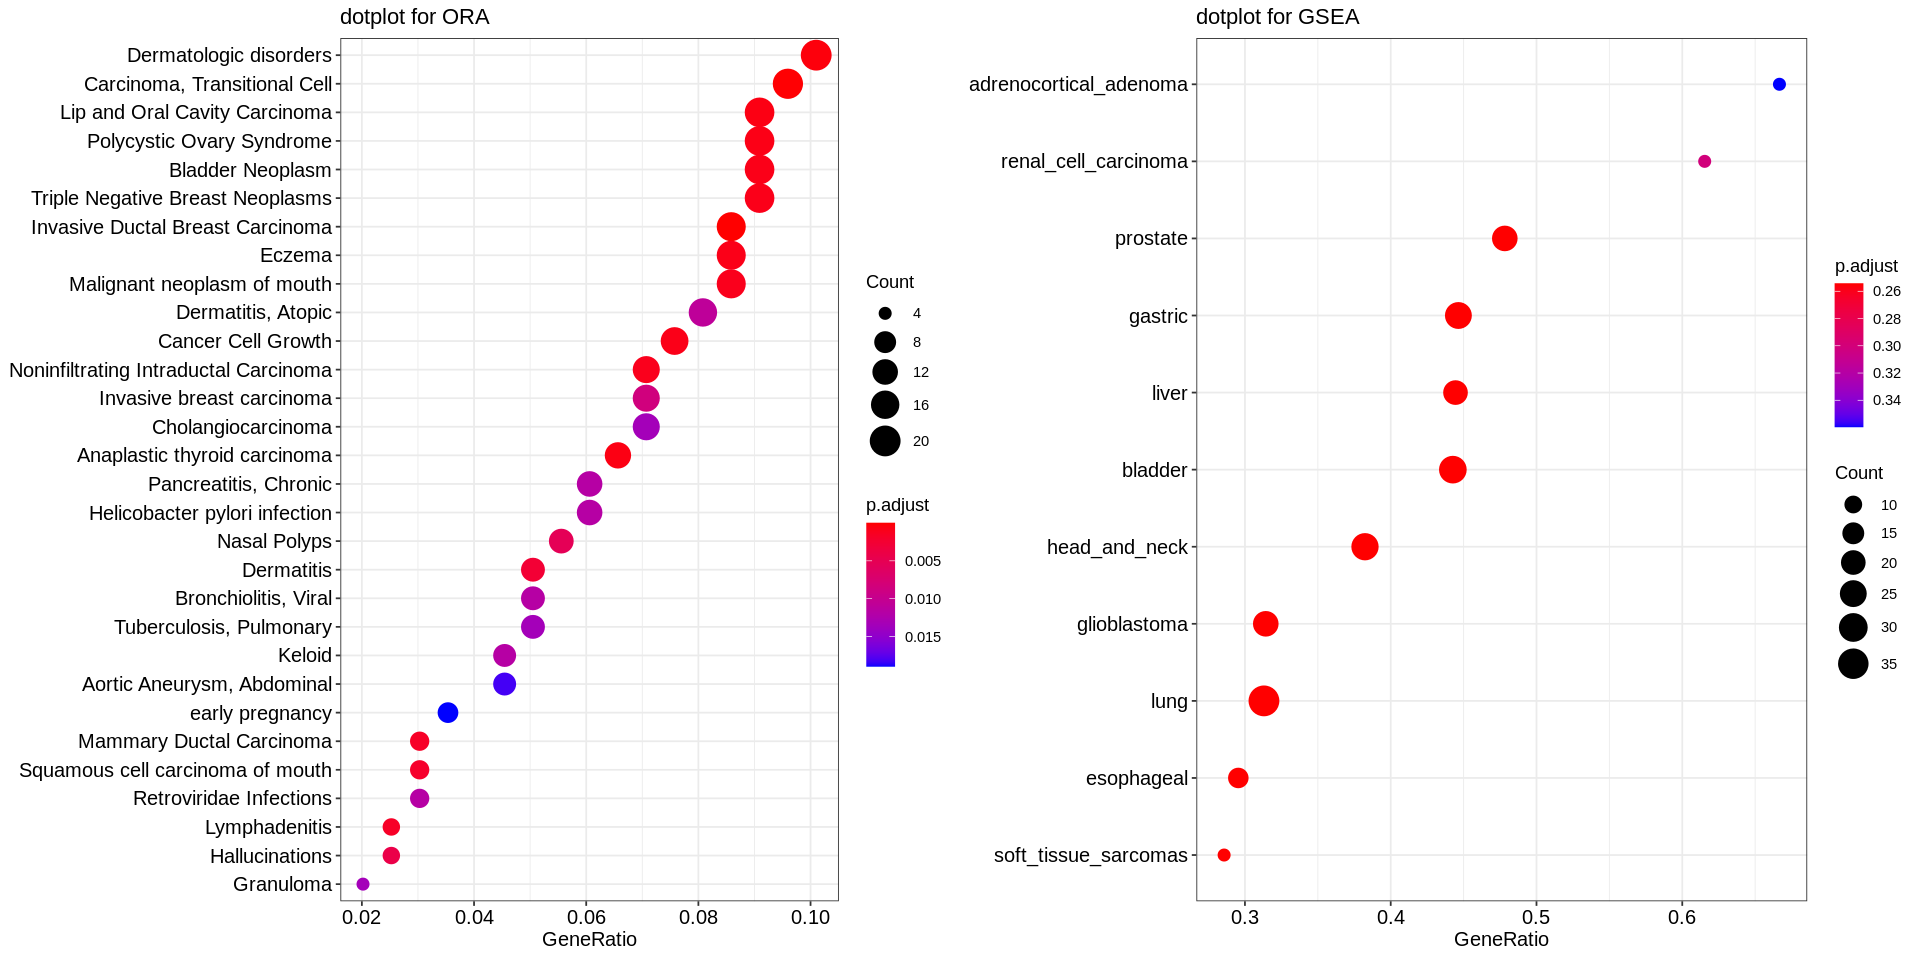

In [113]:
plot_grid(p1, p2, ncol=2)

In [114]:
?cnetplot

In [115]:
## convert gene ID to Symbol
edox <- setReadable(edo, 'org.Hs.eg.db', 'ENTREZID')
p1 <- cnetplot(edox, foldChange=geneList)
## categorySize can be scaled by 'pvalue' or 'geneNum'
p2 <- cnetplot(edox, categorySize="pvalue", foldChange=geneList)
p3 <- cnetplot(edox, foldChange=geneList, circular = TRUE, colorEdge = TRUE)

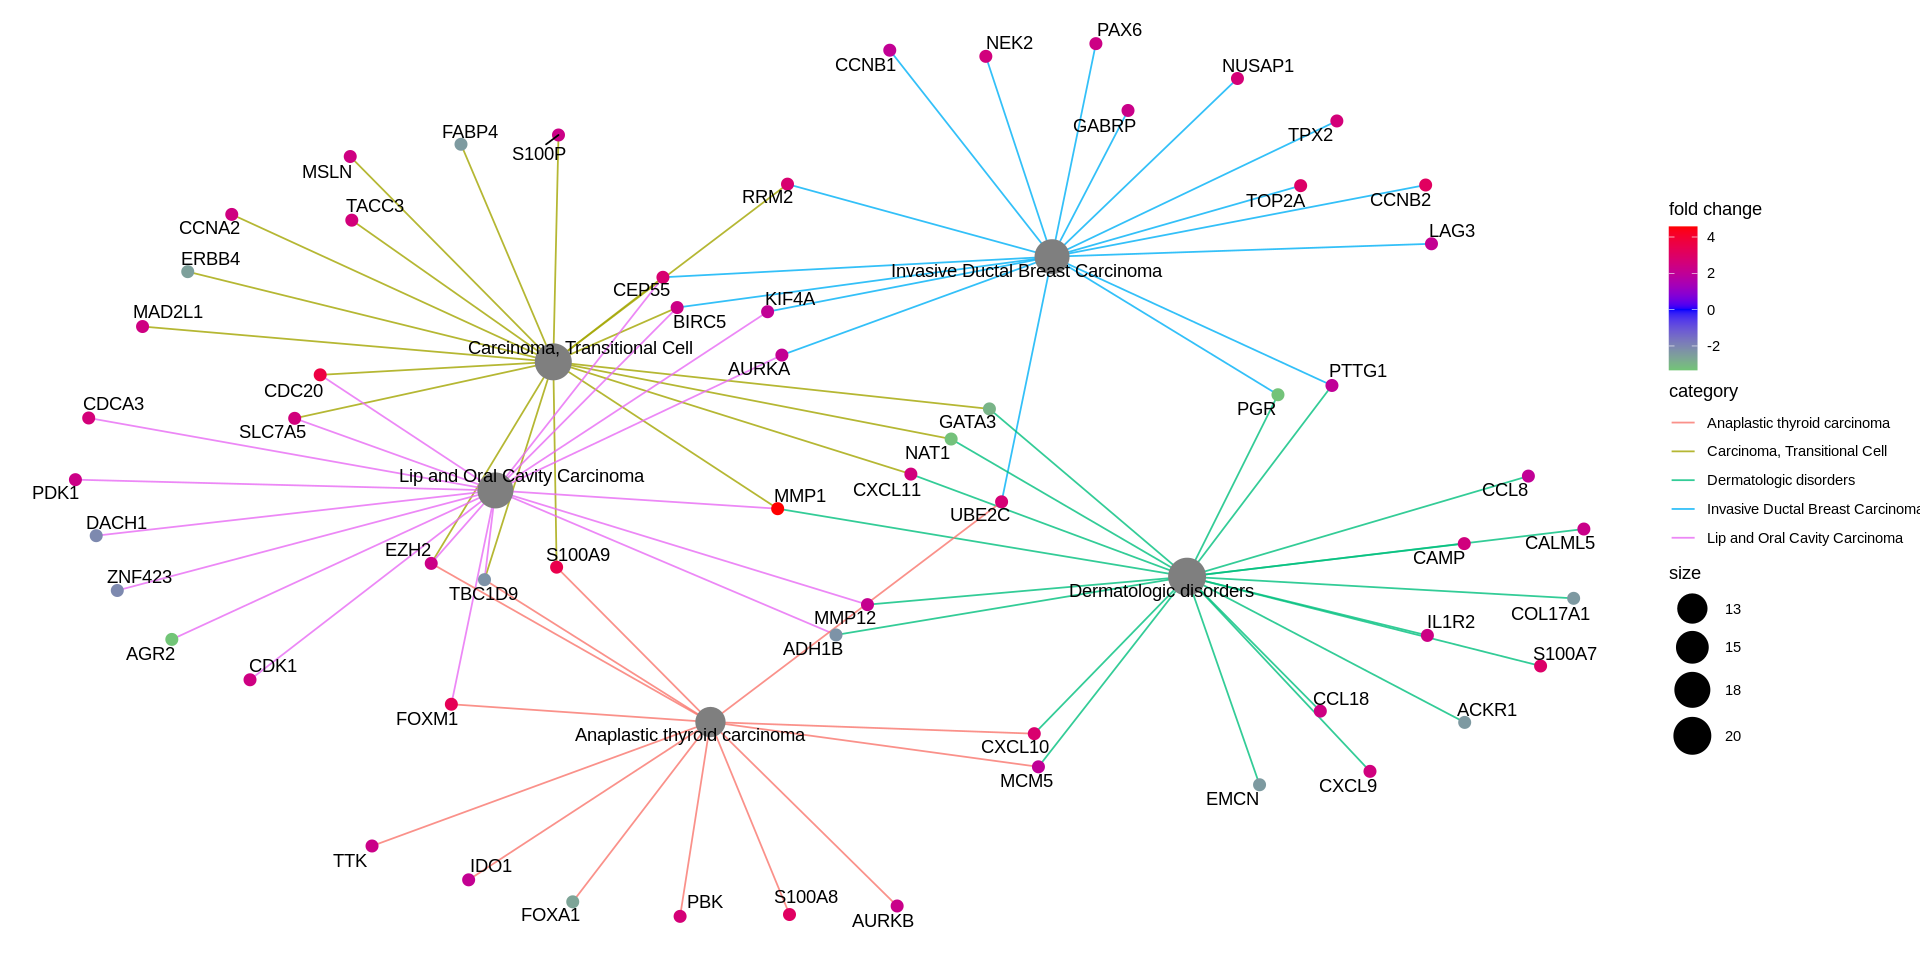

In [116]:
cnetplot(edox, foldChange=geneList, showCategory = 5,colorEdge=TRUE,circular=F)

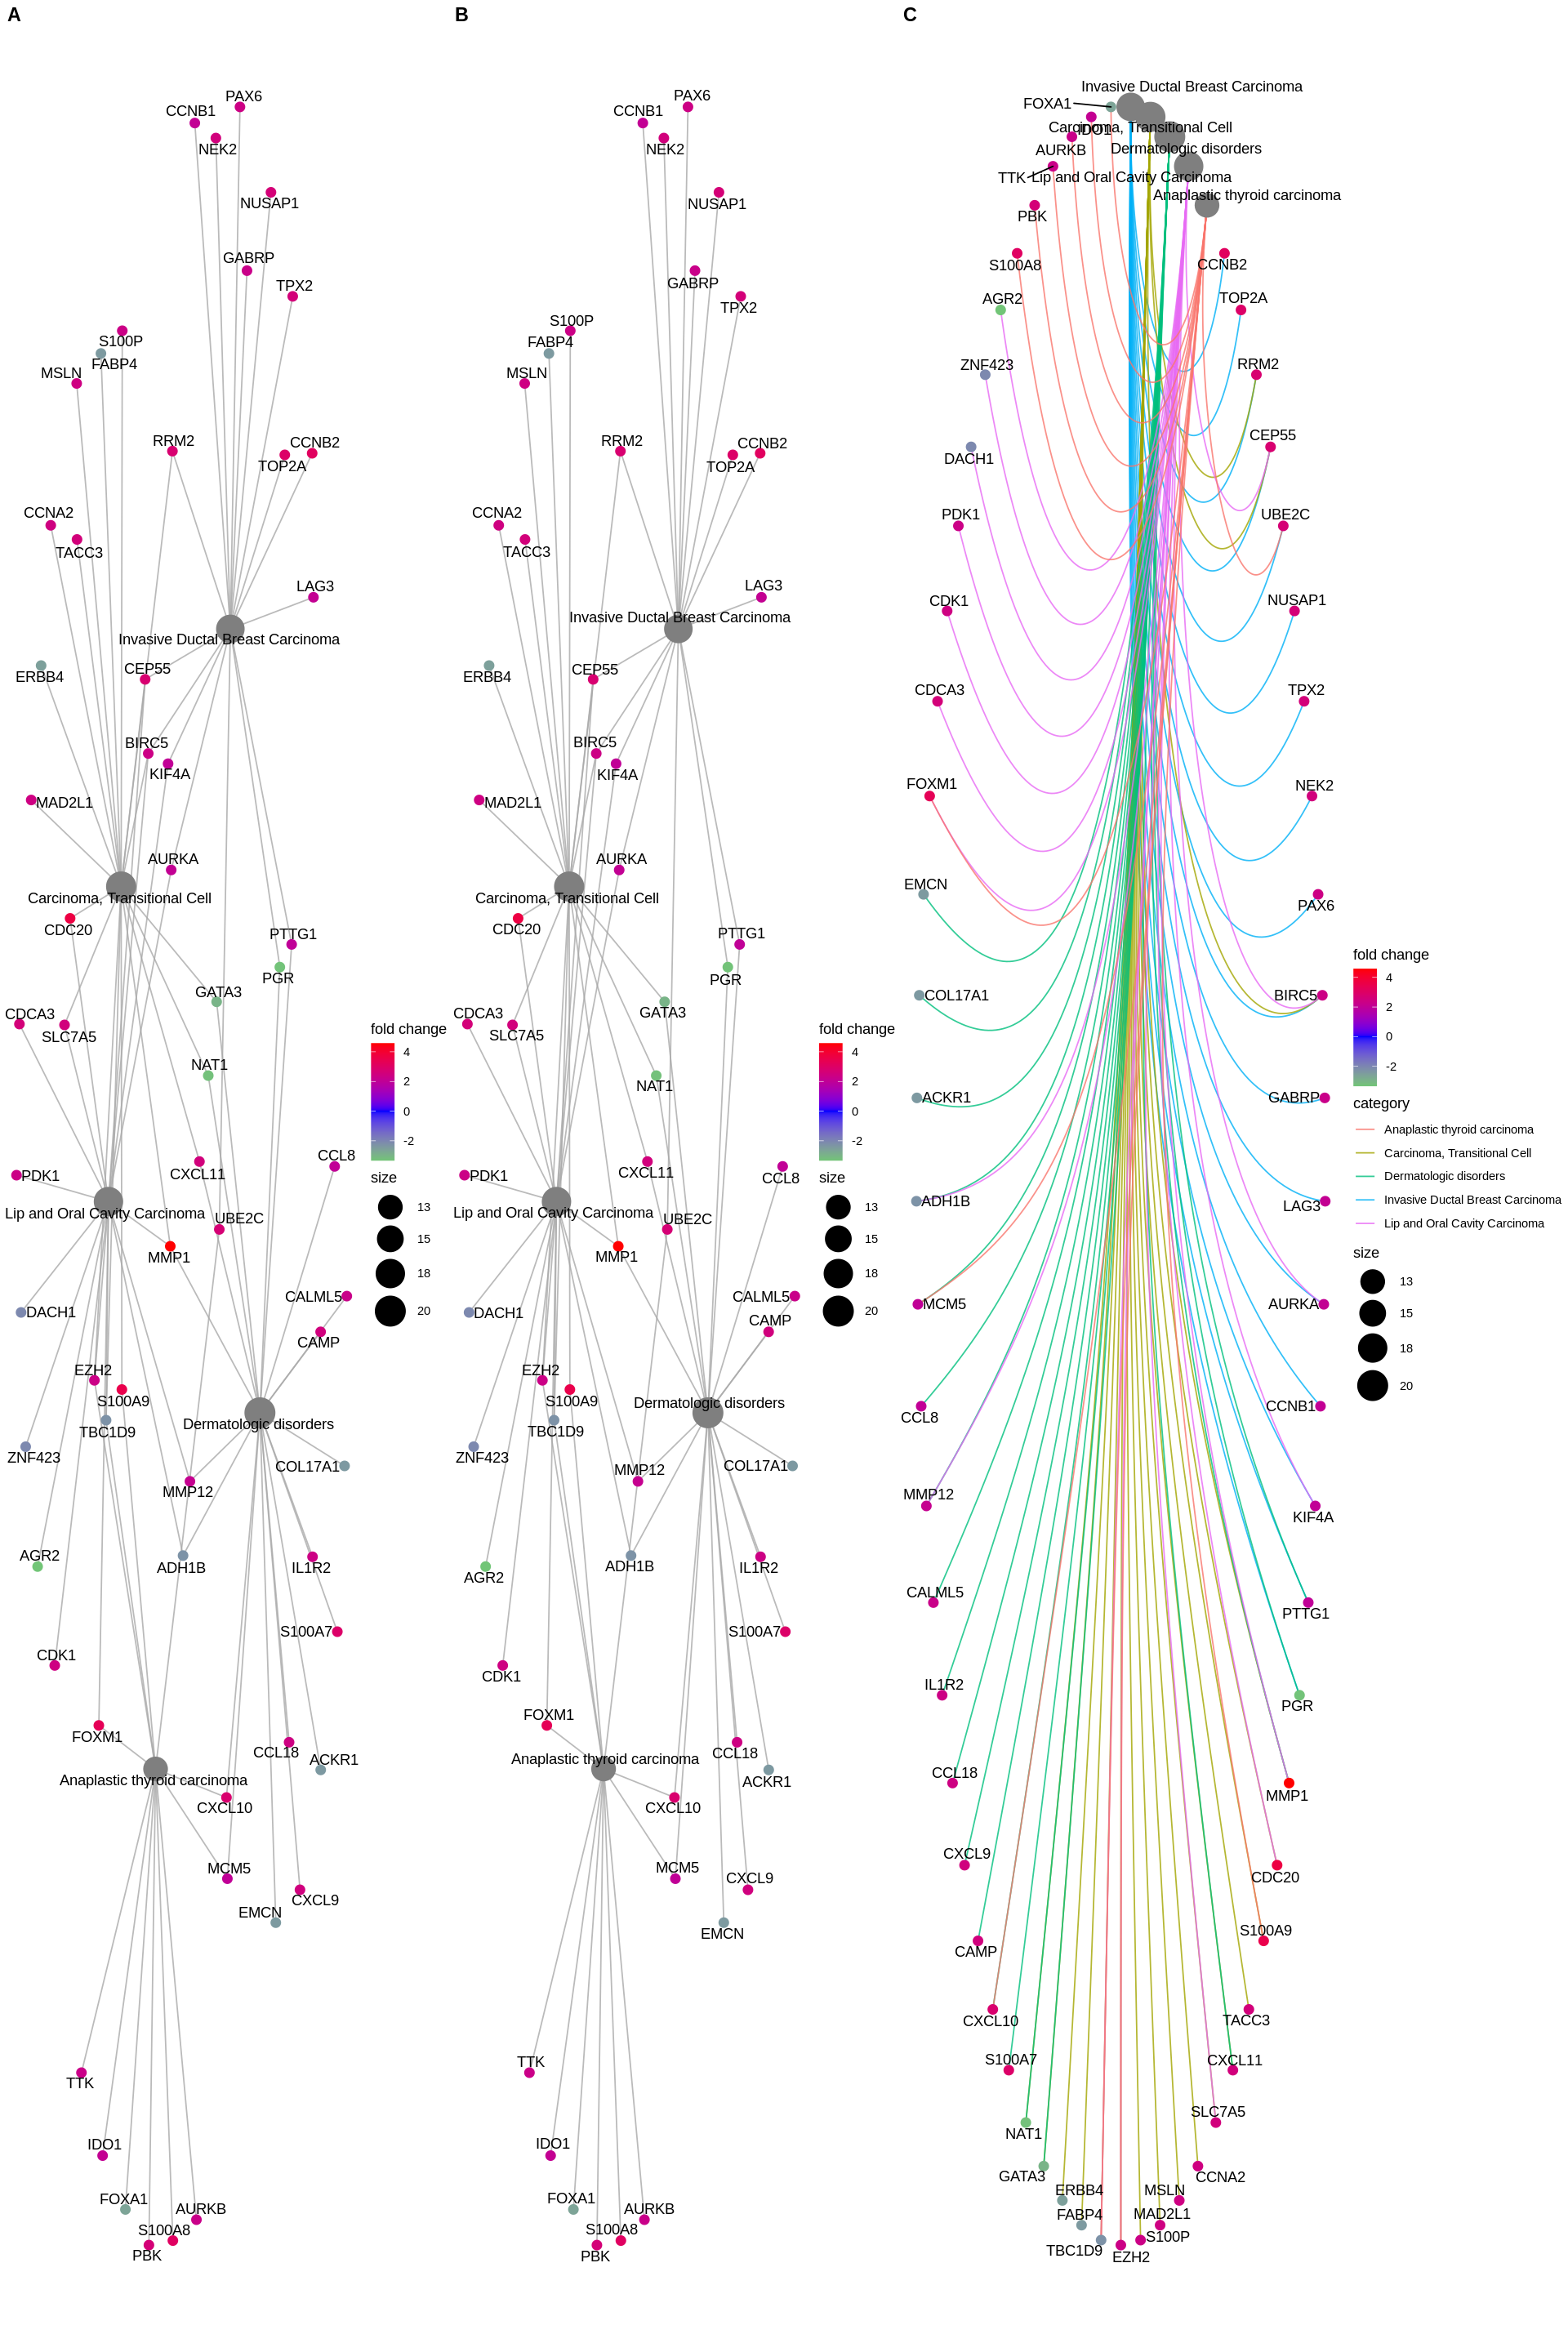

In [117]:
options(repr.plot.width=16, repr.plot.height=24)

cowplot::plot_grid(p1, p2, p3, ncol=3, labels=LETTERS[1:3], rel_widths=c(.8, .8, 1.2))

something wrong with this. 

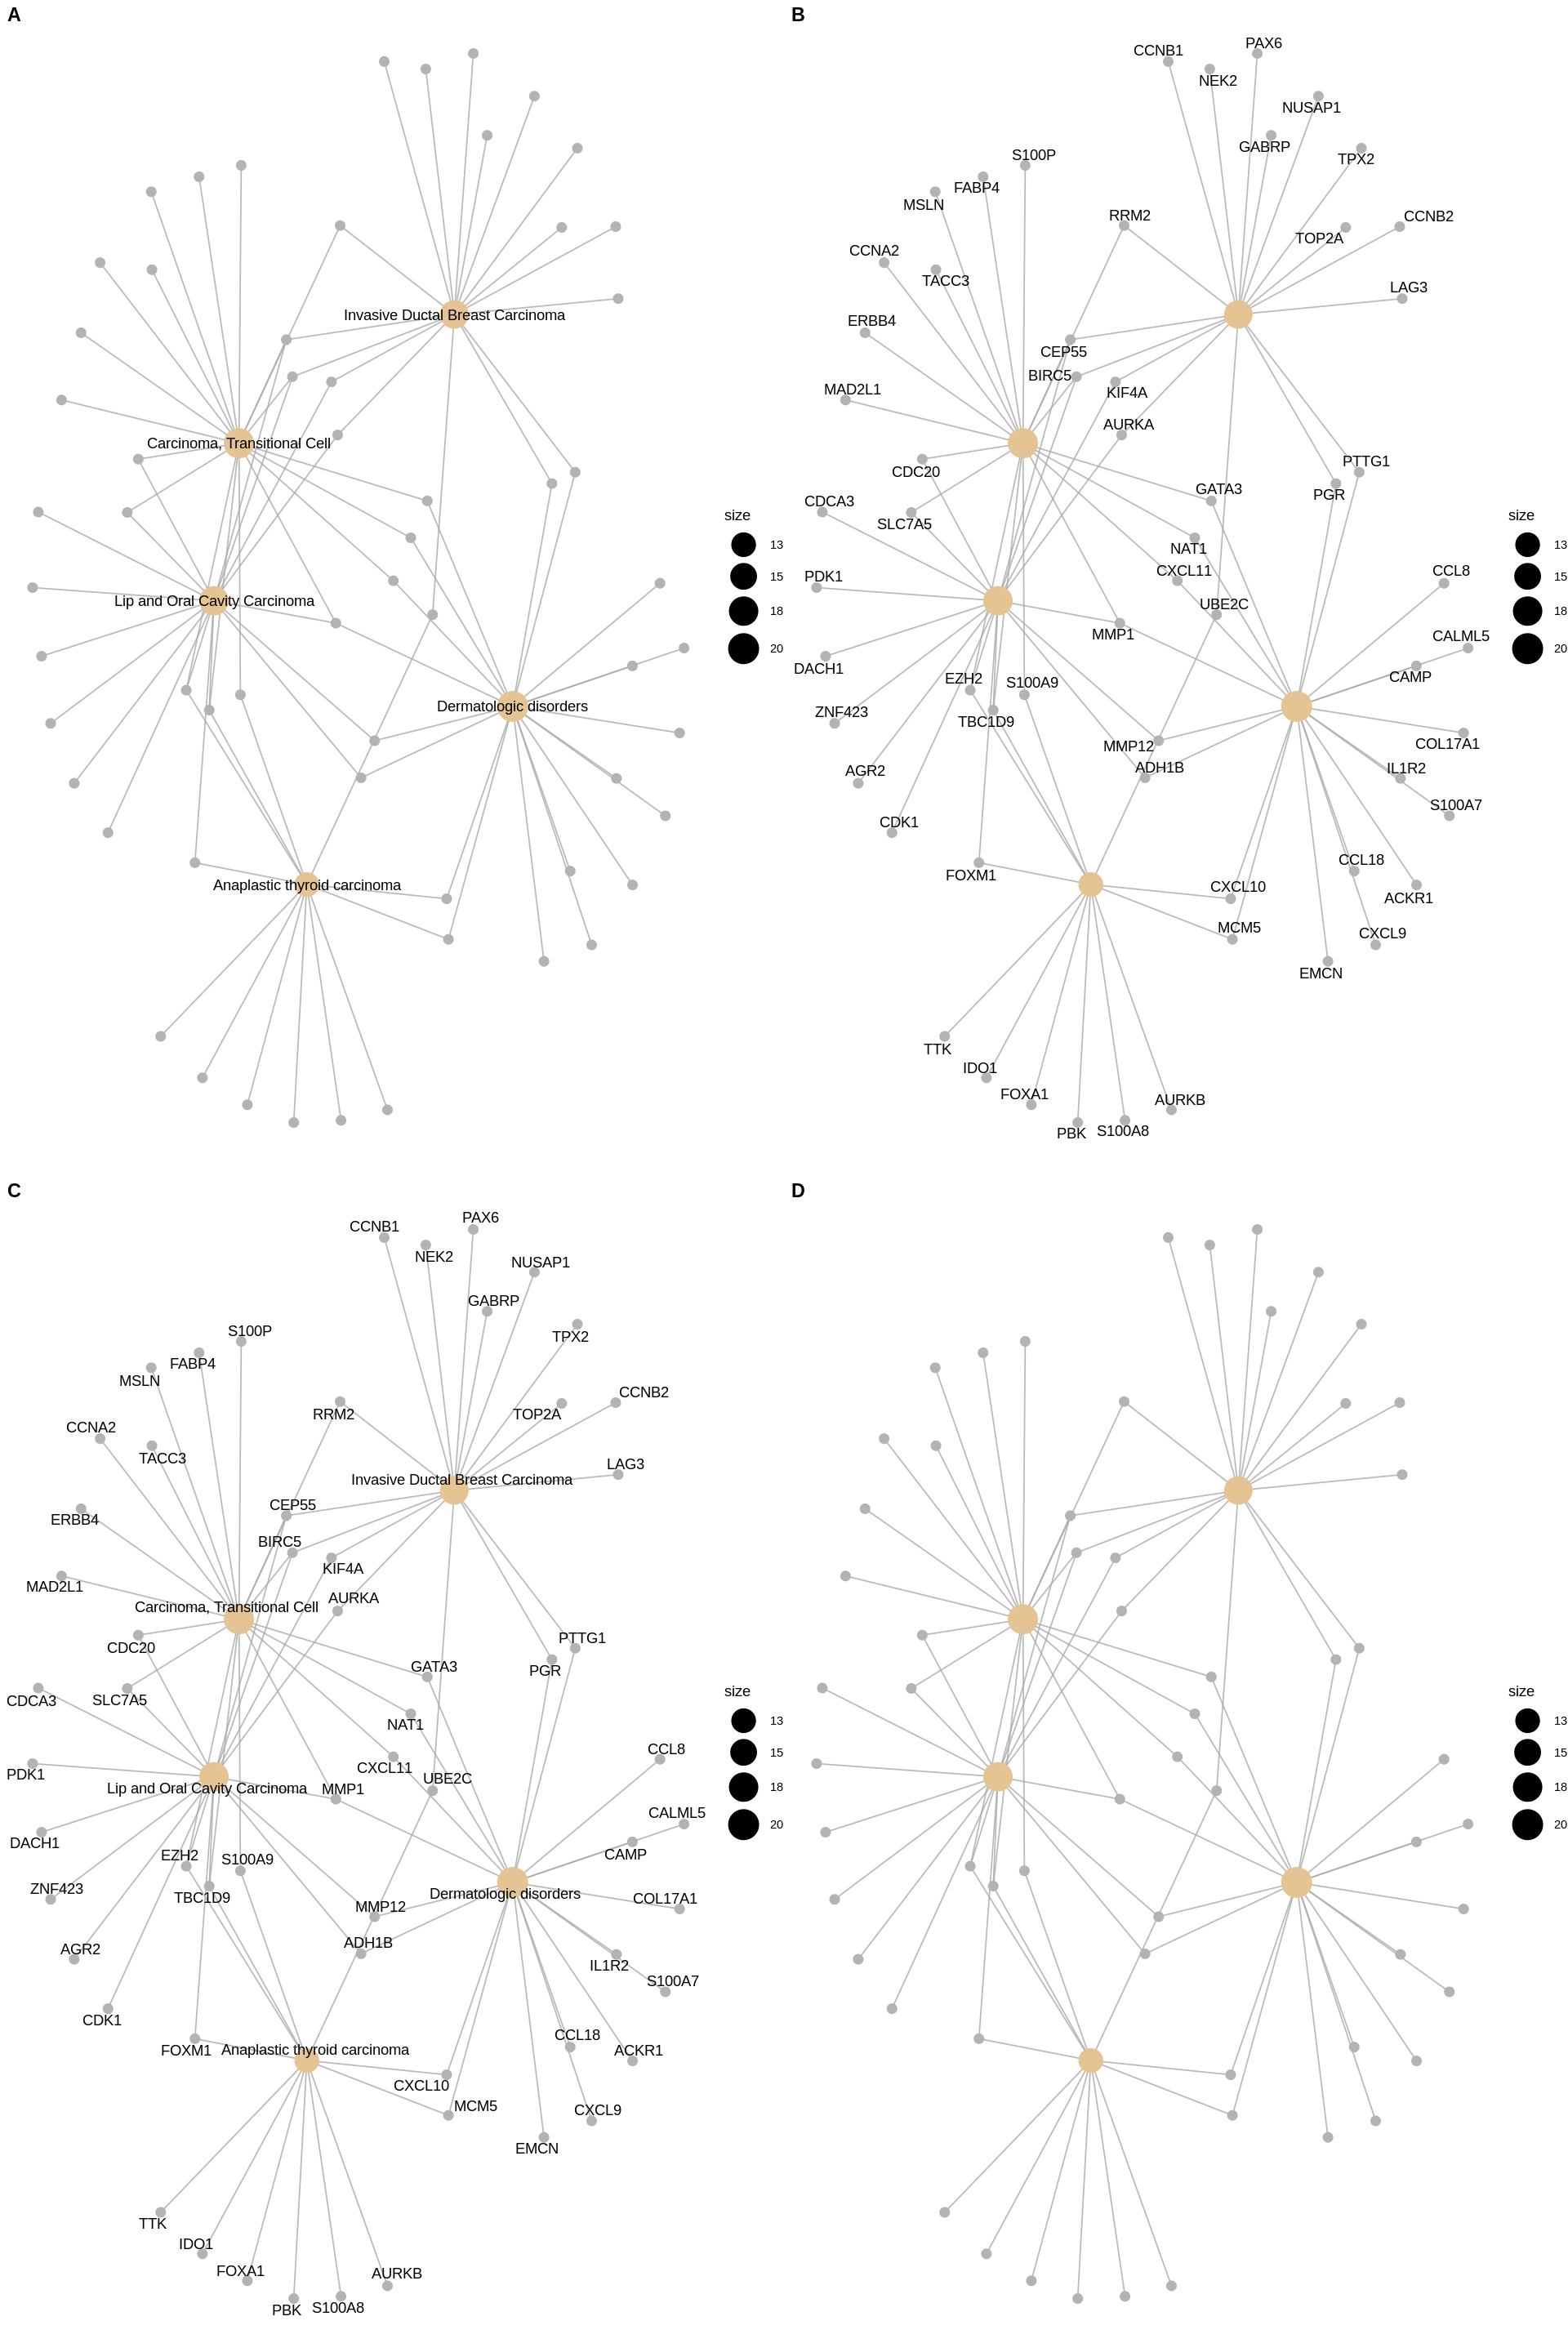

In [118]:
p1 <- cnetplot(edox, node_label="category") 
p2 <- cnetplot(edox, node_label="gene") 
p3 <- cnetplot(edox, node_label="all") 
p4 <- cnetplot(edox, node_label="none") 
cowplot::plot_grid(p1, p2, p3, p4, ncol=2, labels=LETTERS[1:4])

# 12.4 Heatmap-like functional classification


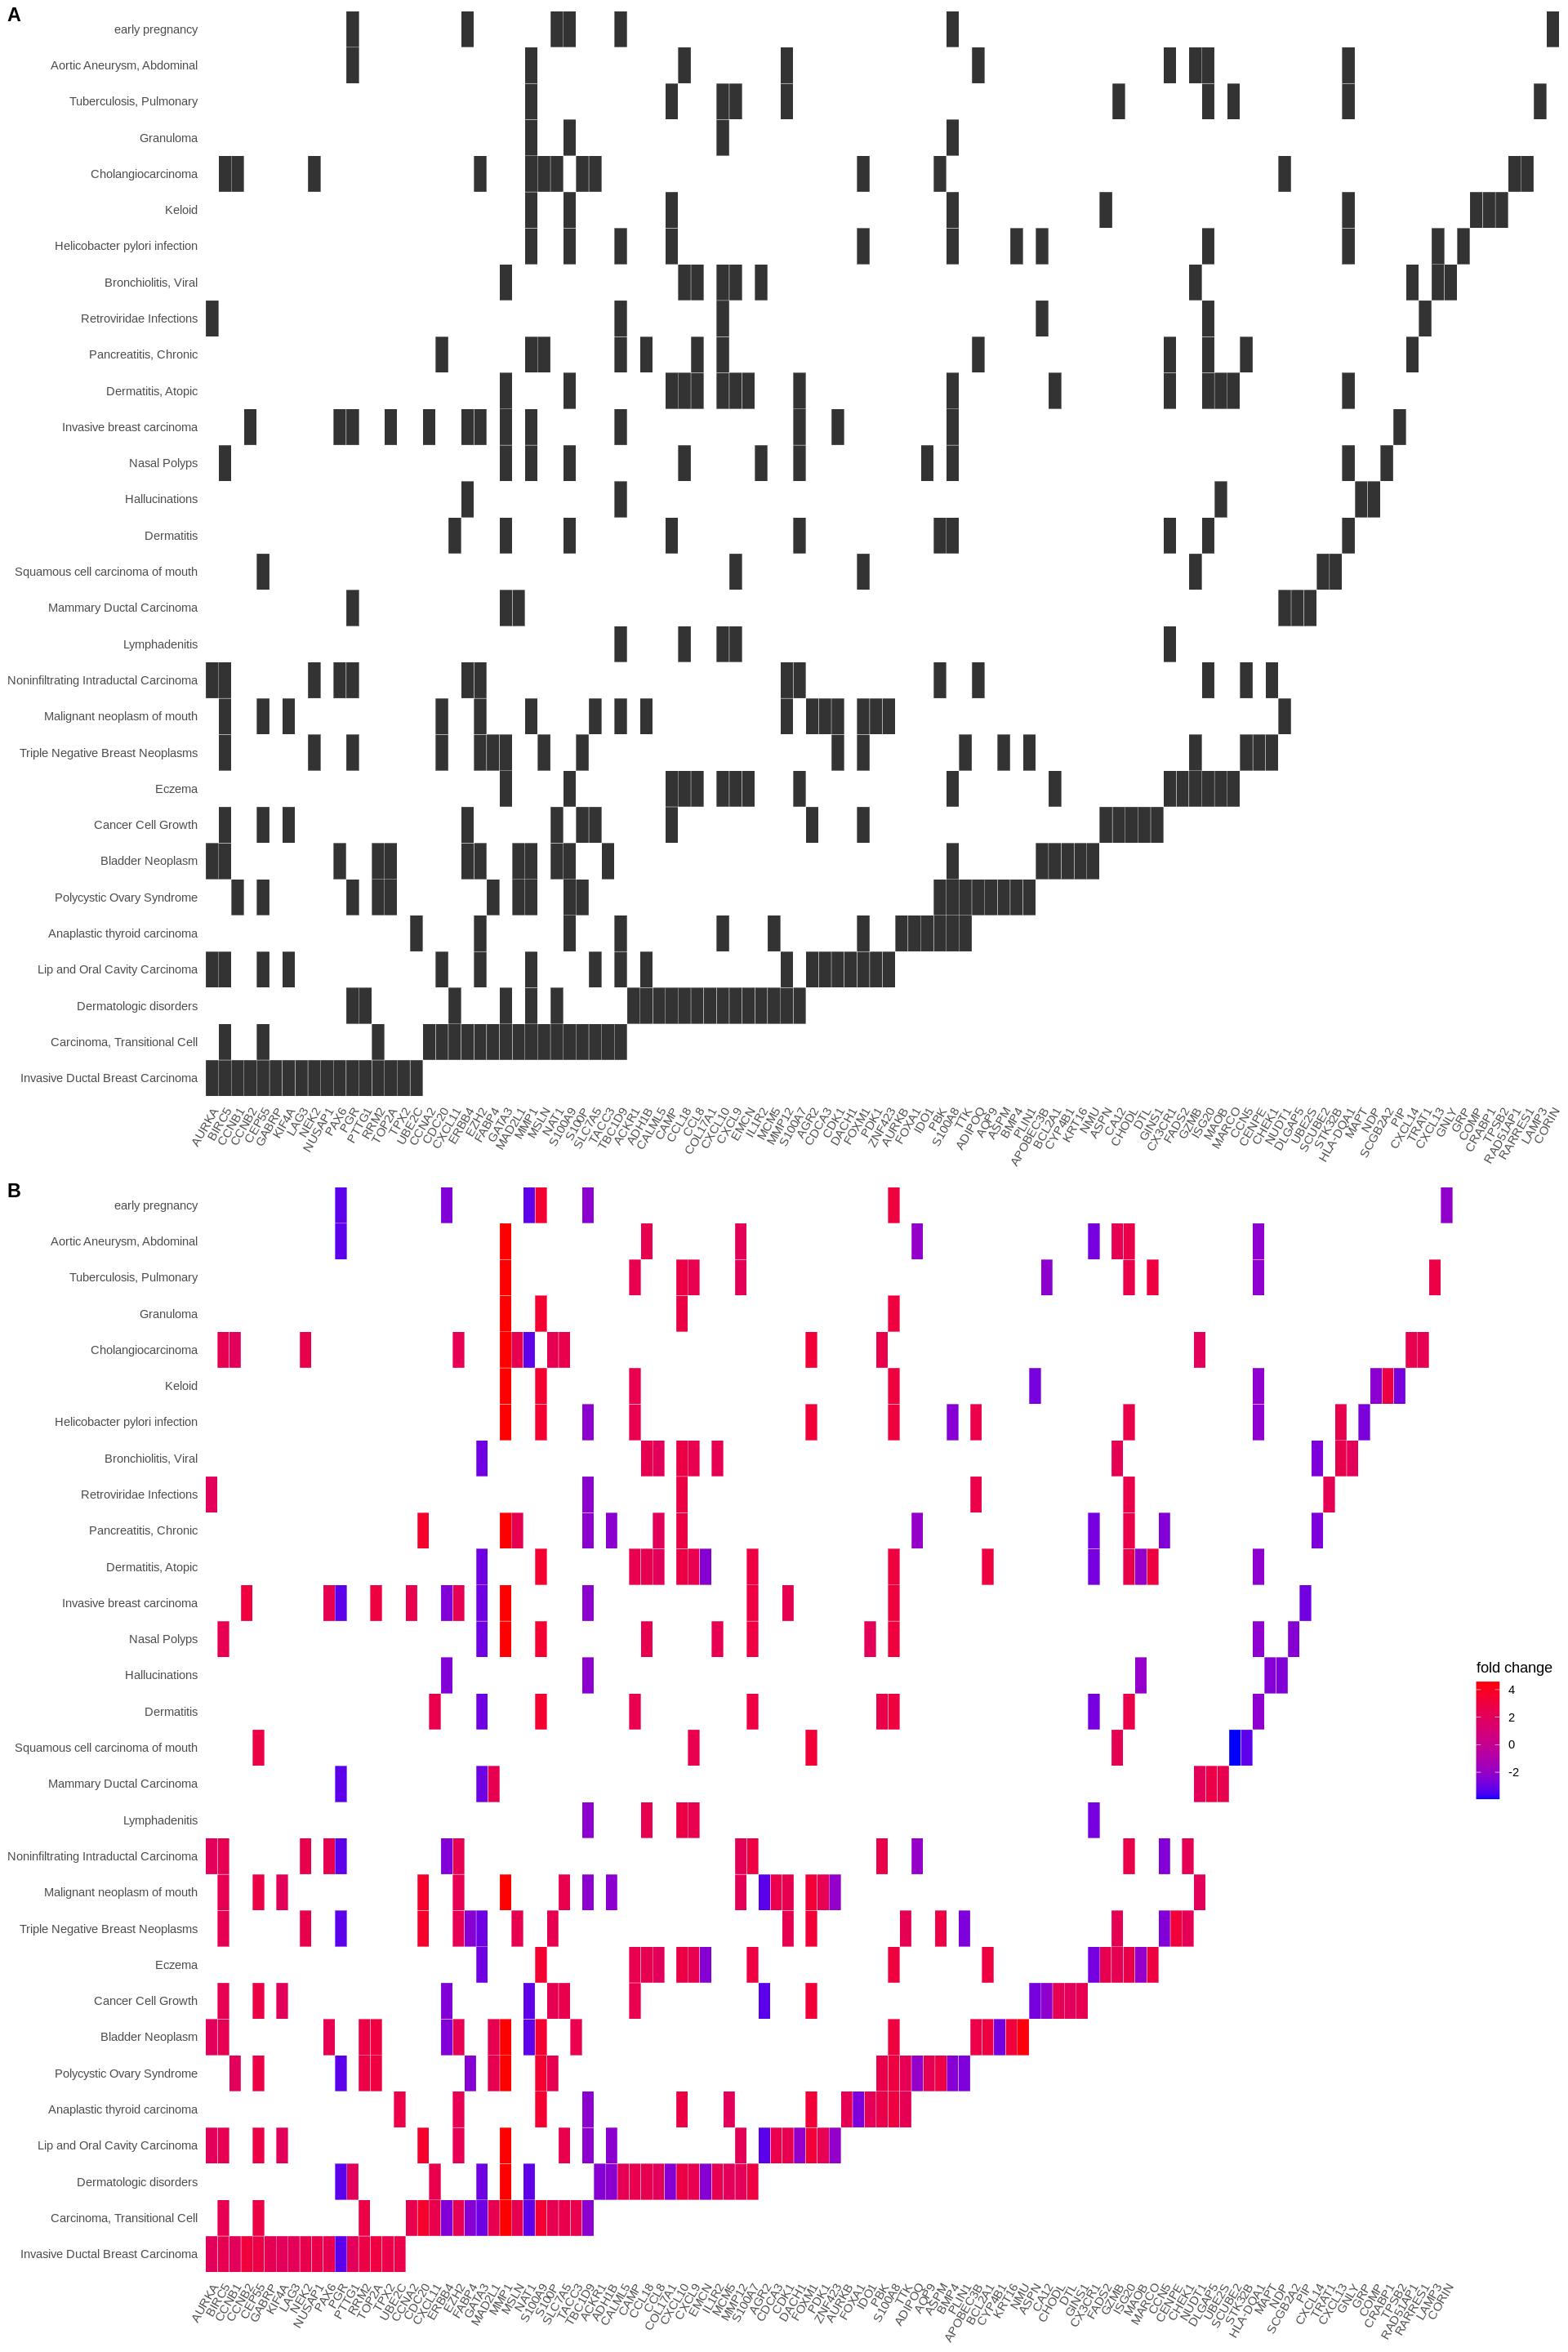

In [119]:
p1 <- heatplot(edox)
p2 <- heatplot(edox, foldChange=geneList)
cowplot::plot_grid(p1, p2, ncol=1, labels=LETTERS[1:2])

# 12.5 Enrichment Map


In [120]:
p1 <- emapplot(edo)
p2 <- emapplot(edo, pie_scale=1.5)
p3 <- emapplot(edo,layout="kk")
p4 <- emapplot(edo, pie_scale=1.5,layout="kk") 

In [121]:
options(repr.plot.width=16, repr.plot.height=24)
#cowplot::plot_grid(p1, p2, p3, p4, ncol=2, labels=LETTERS[1:4])

In [122]:
?emapplot

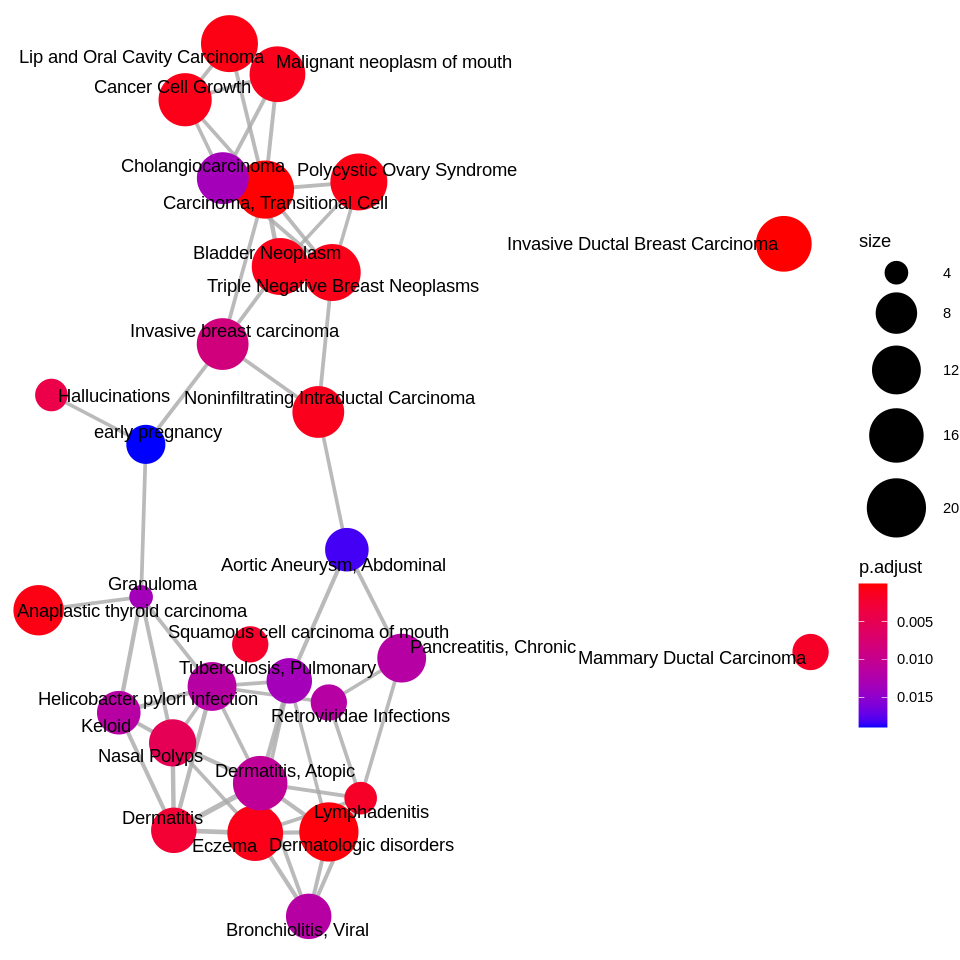

In [123]:
options(repr.plot.width=8, repr.plot.height=8)
emapplot(edo, pie_scale=2,layout="kk", font.size=1,cex=0.4) 

In [124]:
?compareCluster

In [127]:
library(clusterProfiler)
data(gcSample)
xx <- compareCluster(gcSample, fun="enrichKEGG",
                     organism="hsa", pvalueCutoff=0.05)
p1 <- emapplot(xx)
p2 <- emapplot(xx,legend_n=2) 
p3 <- emapplot(xx,pie="count")
p4 <- emapplot(xx,pie="count", pie_scale=1.5, layout="kk")

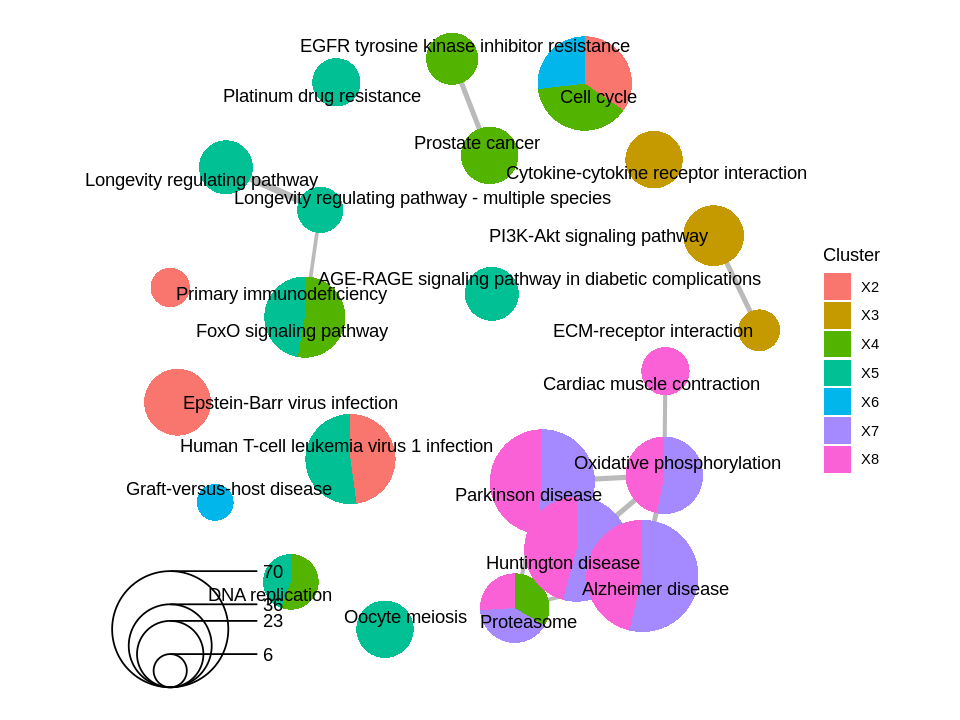

In [128]:
options(repr.plot.width=8, repr.plot.height=6)

emapplot(xx,pie="count", pie_scale=2, layout="kk",legend_n=4)

# 12.6 UpSet Plot


[1] ‘0.3.0’

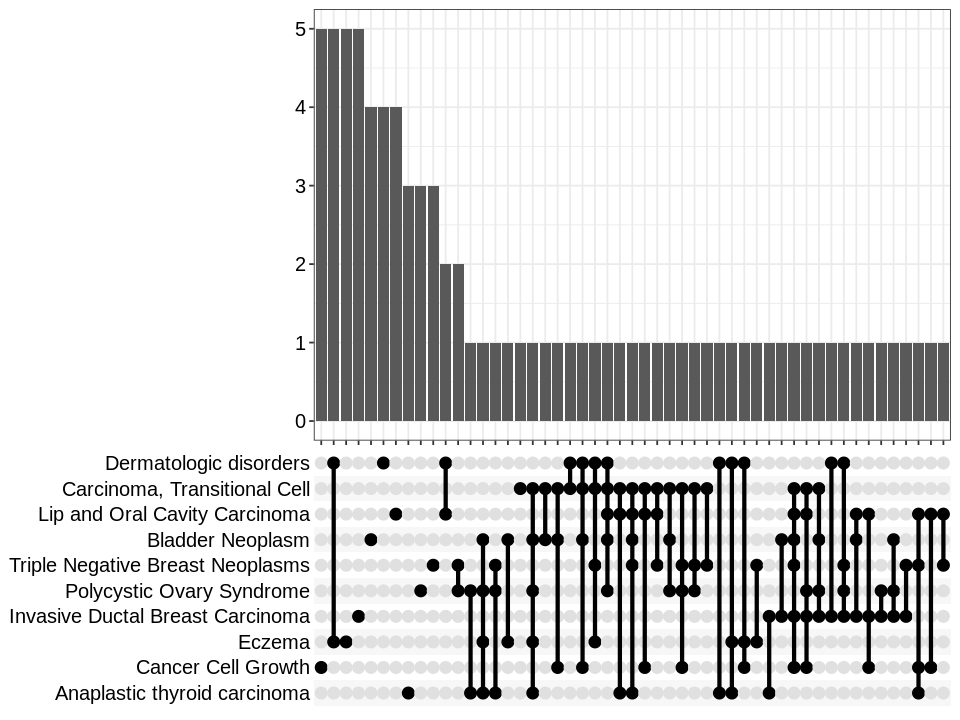

In [129]:
#BiocManager::install("ggupset")
library(ggupset)
packageVersion("ggupset")


upsetplot(edo) # what is the y axis?

unsolved: what is the kk2?

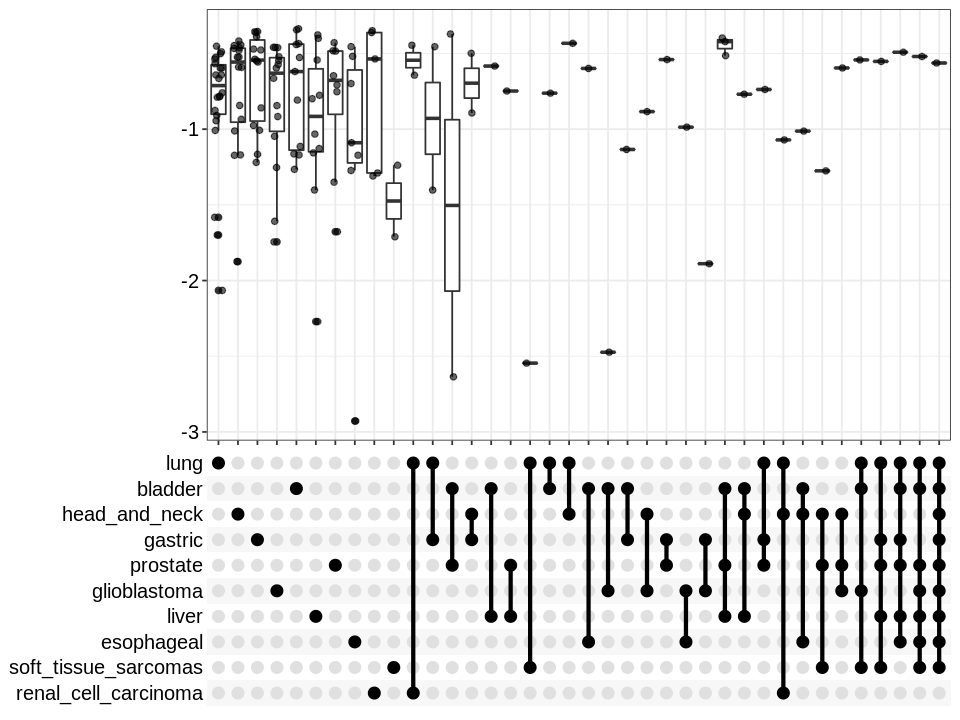

In [130]:
upsetplot(edo2) ## what is the 

12.7 ridgeline plot for expression distribution of GSEA result

Picking joint bandwidth of 0.184


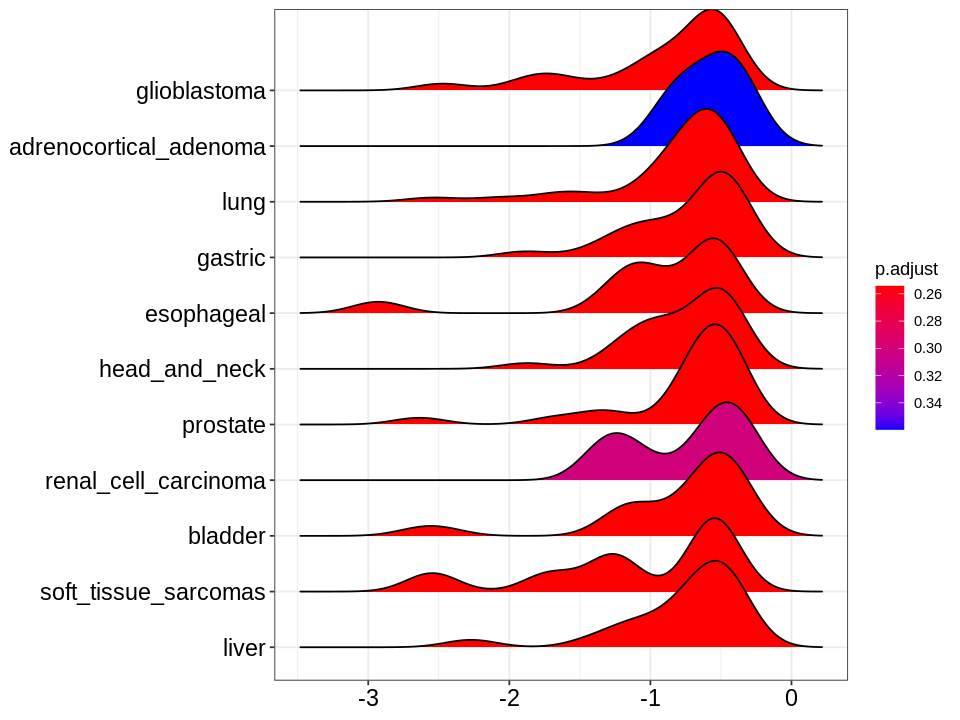

In [131]:
ridgeplot(edo2)

# 12.8 running score and preranked list of GSEA result

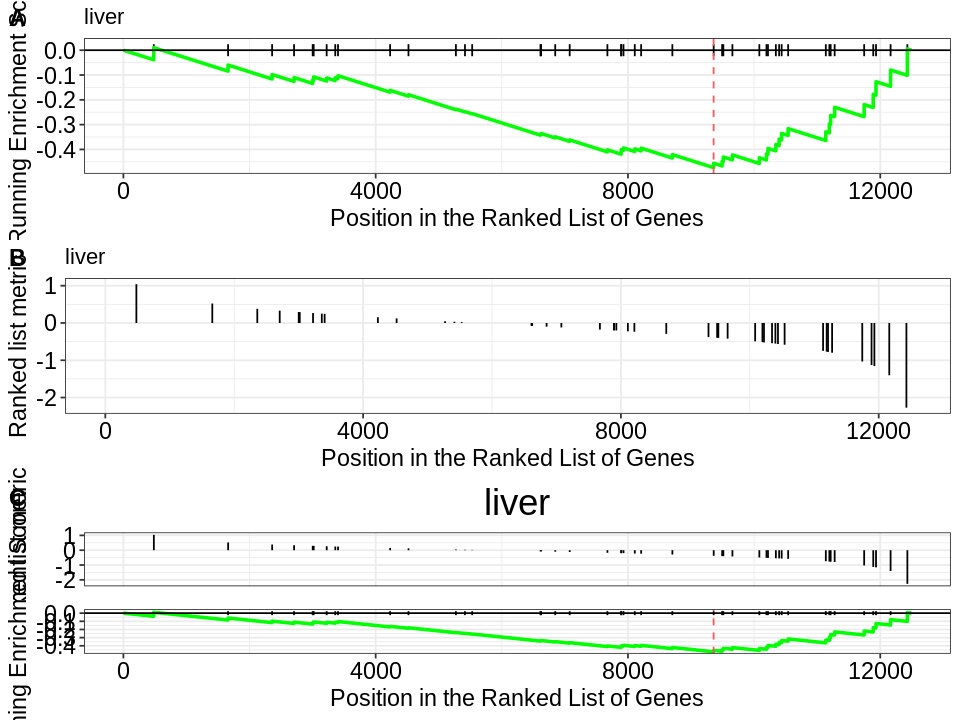

In [142]:
p1 <- gseaplot(edo2, geneSetID = 1, by = "runningScore", title = edo2$Description[1])
p2 <- gseaplot(edo2, geneSetID = 1, by = "preranked", title = edo2$Description[1])
p3 <- gseaplot(edo2, geneSetID = 1, title = edo2$Description[1])
cowplot::plot_grid(p1, p2, p3, ncol=1, labels=LETTERS[1:3])

?gseaplot2

Arguments

x:	gseaResult object

geneSetID: gene set ID

title: plot title

color: color of running enrichment score line

base_size: base font size

rel_heights: relative heights of subplots

subplots: which subplots to be displayed

pvalue_table: whether add pvalue table

ES_geom: geom for plotting running enrichment score, one of 'line' or 'dot'

In [152]:
head(edo2) # same as head(edo2@result).

ID                   Description          setSize
liver                liver                liver                 45    
lung                 lung                 lung                 115    
bladder              bladder              bladder               61    
head_and_neck        head_and_neck        head_and_neck         68    
prostate             prostate             prostate              46    
soft_tissue_sarcomas soft_tissue_sarcomas soft_tissue_sarcomas  28    
                     enrichmentScore NES       pvalue     p.adjust  qvalues  
liver                -0.4733762      -1.544067 0.01963967 0.2542848 0.2425743
lung                 -0.3556788      -1.359853 0.03616583 0.2542848 0.2425743
bladder              -0.4134155      -1.426759 0.03908228 0.2542848 0.2425743
head_and_neck        -0.3944769      -1.387918 0.05035074 0.2542848 0.2425743
prostate             -0.4236662      -1.388366 0.06059137 0.2542848 0.2425743
soft_tissue_sarcomas -0.4847068      -1.436618 0.06164384 0.2542848 0.2425743
                     rank leading_edge                  
liver                3138 tags=44%, list=25%, signal=33%
lung                 2775 tags=31%, list=22%, signal=25%
bladder              2841 tags=44%, list=23%, signal=34%
head_and_neck        2864 tags=38%, list=23%, signal=30%
prostate             3170 tags=48%, list=25%, signal=36%
soft_tissue_sarcomas 2277 tags=29%, list=18%, signal=23%
                     core_enrichment                                                                                                                                                                             
liver                7249/472/1571/4297/8289/9611/5925/22861/1499/7157/2186/595/7248/11059/7769/273/1657/29994/213/125                                                                                           
lung                 5287/29072/92552/53353/8019/8289/3624/5925/107/201229/4763/1499/7157/23314/6794/9811/29119/3791/1301/2322/324/23284/2261/4685/22982/187/9353/2042/862/51364/79776/2737/63923/57088/1602/2066
bladder              7403/287/463/472/4297/2065/2262/8289/9611/5925/2068/4763/7157/2186/1387/3910/2261/7248/23037/23345/7832/79633/10628/22906/388/4036/3169                                                     
head_and_neck        9379/5287/79161/8502/5286/80230/8626/5921/3664/113791/7157/55190/9947/5295/7248/4208/1278/7048/221981/89795/23345/79776/9369/55821/2045/64084                                               
prostate             463/472/4297/11280/1105/8405/8289/9611/5925/54894/1499/7157/5295/1027/2078/324/595/10142/2045/7704/367/3169                                                                                 
soft_tissue_sarcomas 5925/4763/1499/7157/5159/2045/3667/2066

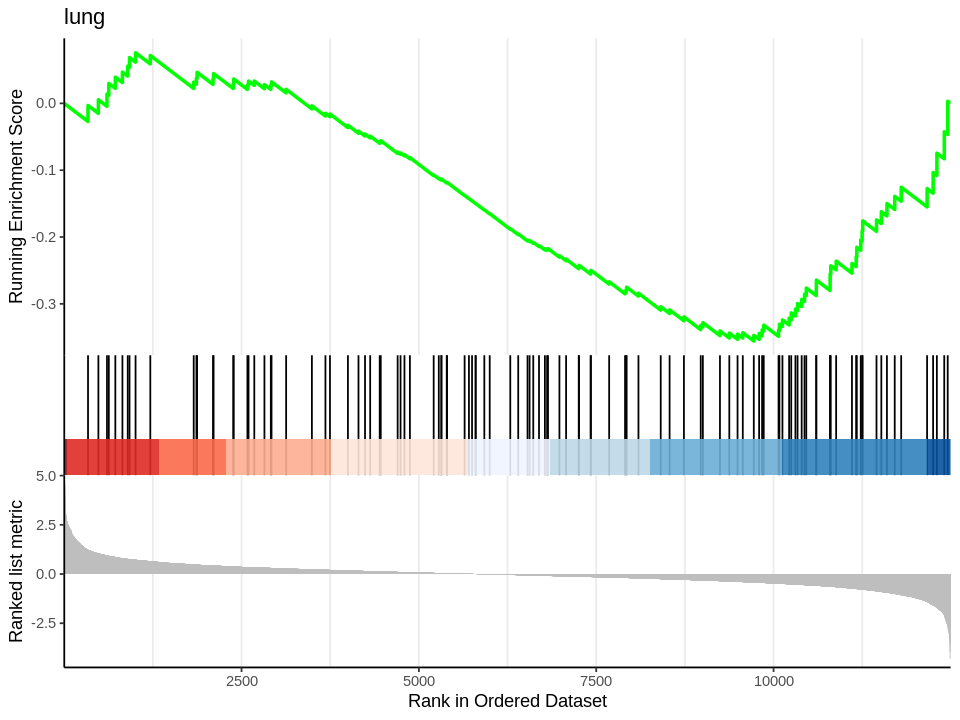

In [146]:
gseaplot2(edo2, geneSetID = 2, title = edo2$Description[2]) # geneSetID are the row number in the edo2 object

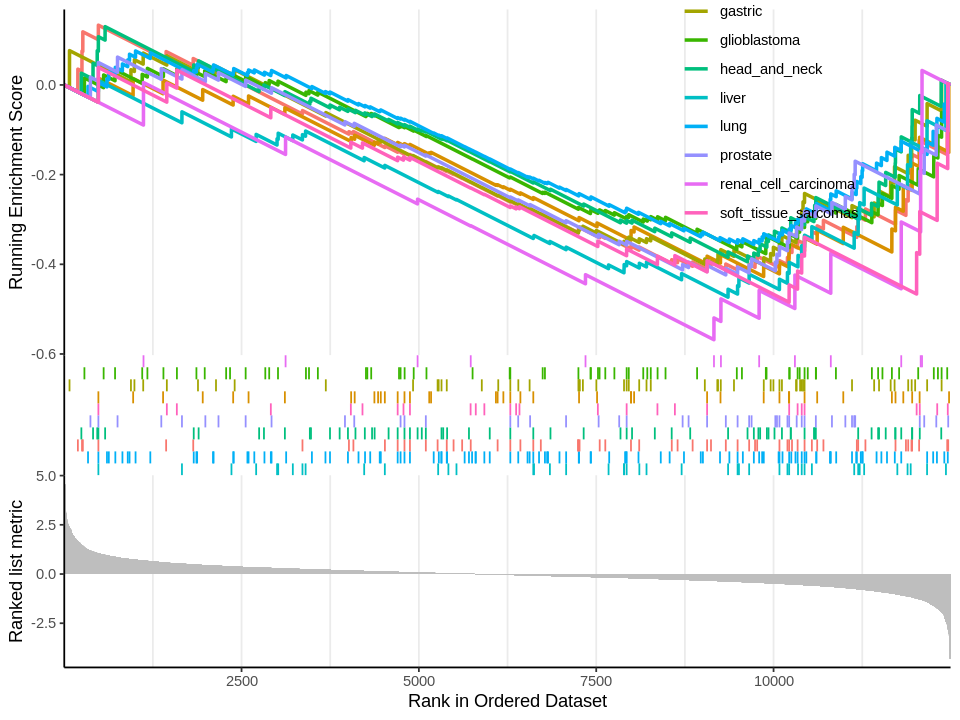

In [153]:
gseaplot2(edo2, geneSetID = 1:10)

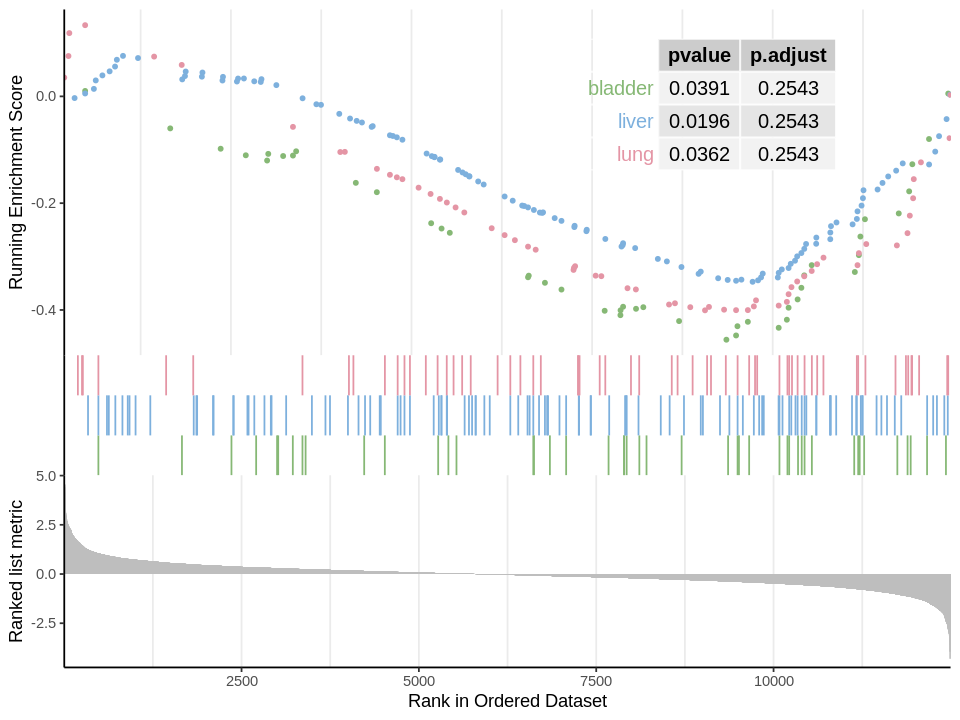

In [135]:
gseaplot2(edo2, geneSetID = 1:3, pvalue_table = TRUE,
          color = c("#E495A5", "#86B875", "#7DB0DD"), ES_geom = "dot")

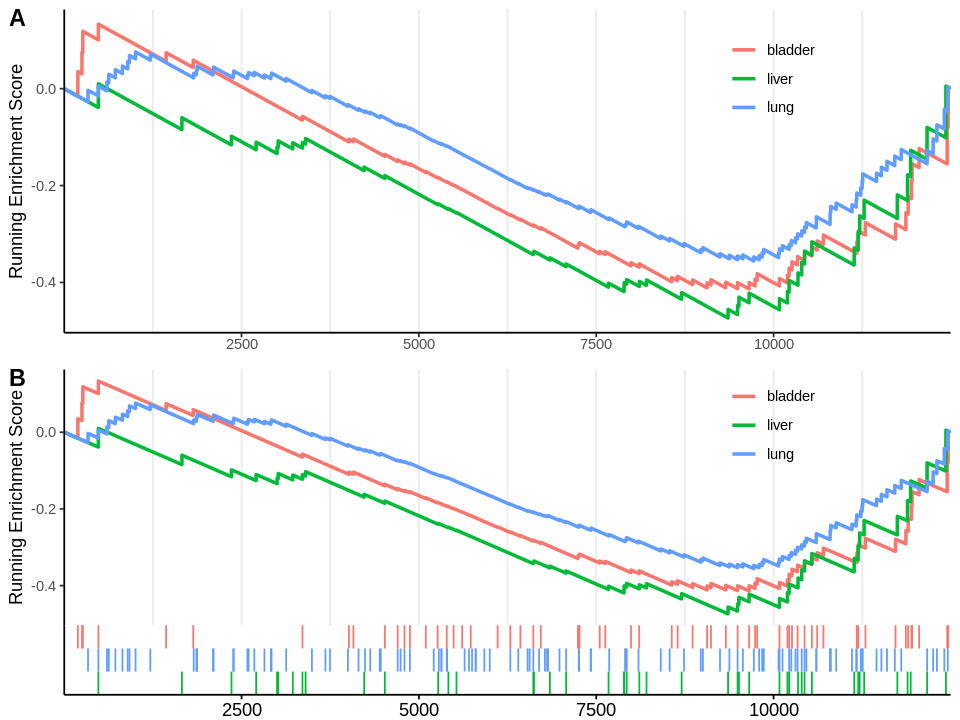

In [136]:
p1 <- gseaplot2(edo2, geneSetID = 1:3, subplots = 1)
p2 <- gseaplot2(edo2, geneSetID = 1:3, subplots = 1:2)
cowplot::plot_grid(p1, p2, ncol=1, labels=LETTERS[1:2])

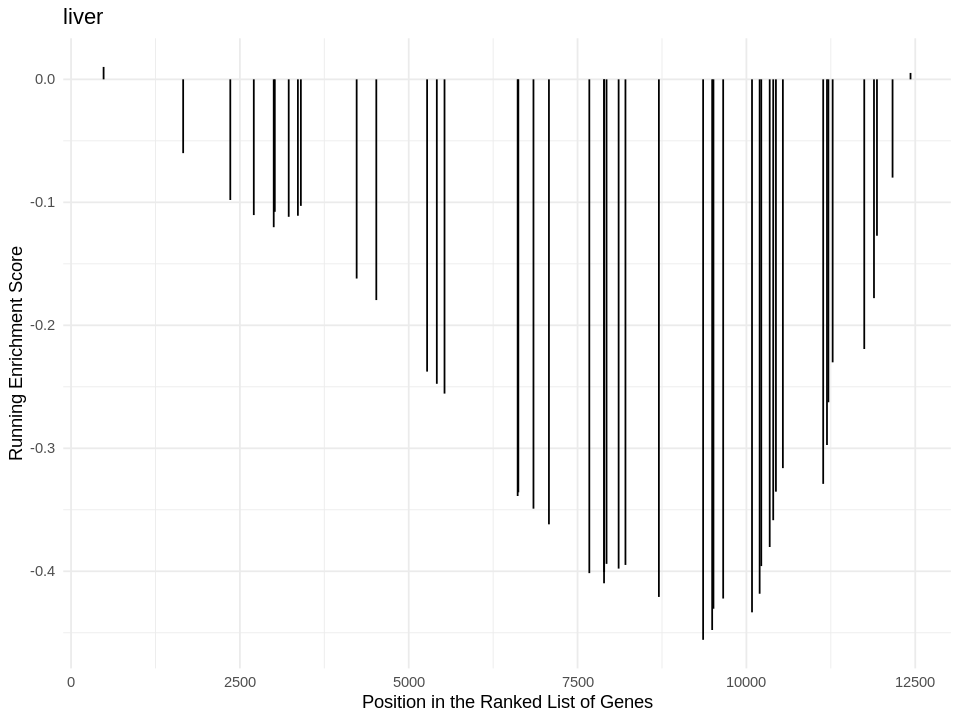

In [137]:
gsearank(edo2, 1, title = edo2[1, "Description"])

In [138]:
library(ggplot2)
library(cowplot)


********************************************************
Note: As of version 1.0.0, cowplot does not change the
  default ggplot2 theme anymore. To recover the previous
  behavior, execute:
  theme_set(theme_cowplot())
********************************************************



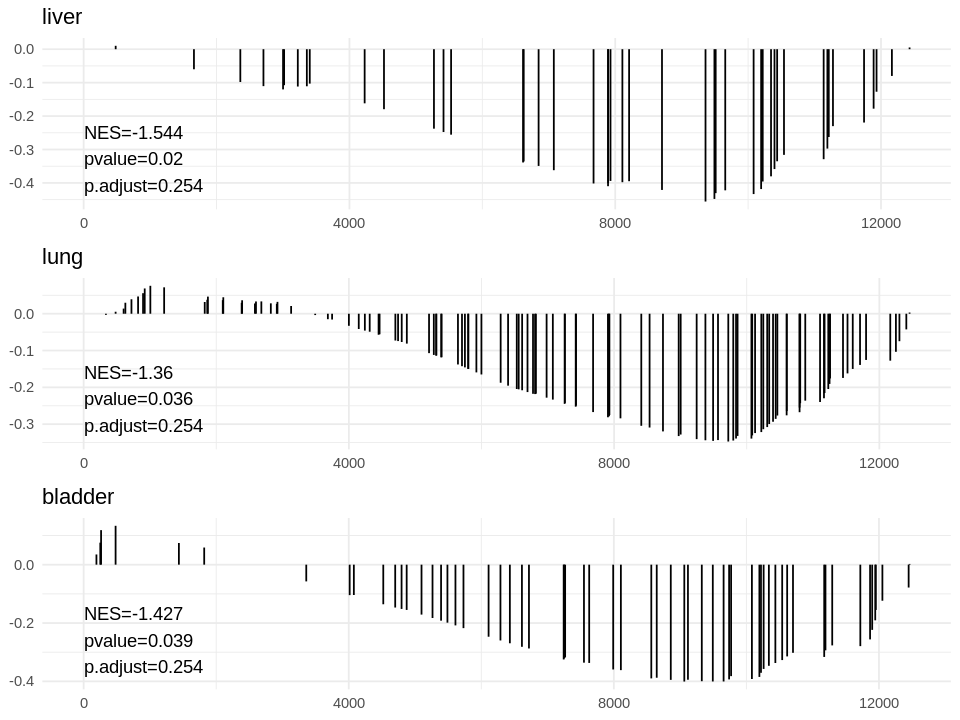

In [139]:
pp <- lapply(1:3, function(i) {
  anno <- edo2[i, c("NES", "pvalue", "p.adjust")]
  lab <- paste0(names(anno), "=",  round(anno, 3), collapse="\n")
  
  gsearank(edo2, i, edo2[i, 2]) + xlab(NULL) +ylab(NULL) +
    annotate("text", 0, edo2[i, "enrichmentScore"] * .9, label = lab, hjust=0, vjust=0)
})
plot_grid(plotlist=pp, ncol=1)

# 12.9 pubmed trend of enriched terms

Warning message:
“`as_data_frame()` is deprecated as of tibble 2.0.0.
Please use `as_tibble()` instead.
The signature and semantics have changed, see `?as_tibble`.
This warning is displayed once every 8 hours.
Call `lifecycle::last_warnings()` to see where this warning was generated.”Warning message:
“`data_frame()` is deprecated as of tibble 1.1.0.
Please use `tibble()` instead.
This warning is displayed once every 8 hours.
Call `lifecycle::last_warnings()` to see where this warning was generated.”

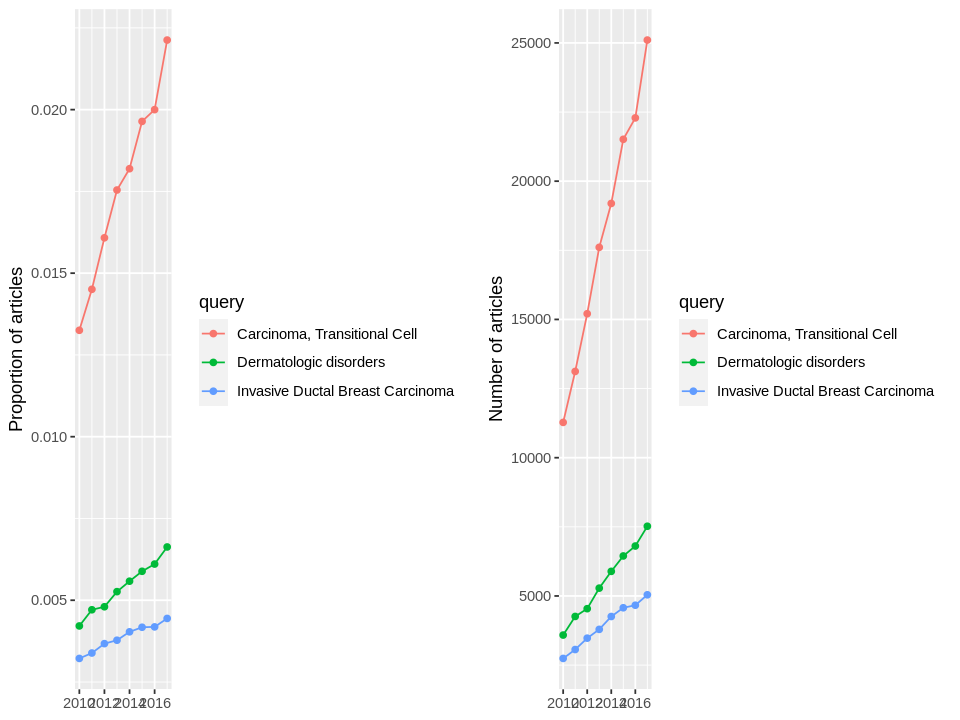

In [140]:
terms <- edo$Description[1:3]
p <- pmcplot(terms, 2010:2017)
p2 <- pmcplot(terms, 2010:2017, proportion=FALSE)
plot_grid(p, p2, ncol=2)

12.10 goplot
where is this ego? I don't find this. 

In [141]:
goplot(ego)

ERROR: Error in goplot(ego): object 'ego' not found


# 12.11 browseKEGG
kk not found ???

In [155]:
browseKEGG(kk, 'hsa04110')

ERROR: Error in paste0("http://www.kegg.jp/kegg-bin/show_pathway?", pathID, "/", : object 'kk2' not found


12.12 pathview from pathview package


In [156]:
library("pathview")
library("pathview")
hsa04110 <- pathview(gene.data  = geneList,
                     pathway.id = "hsa04110",
                     species    = "hsa",
                     limit      = list(gene=max(abs(geneList)), cpd=1))

##############################################################################
Pathview is an open source software package distributed under GNU General
Public License version 3 (GPLv3). Details of GPLv3 is available at
http://www.gnu.org/licenses/gpl-3.0.html. Particullary, users are required to
formally cite the original Pathview paper (not just mention it) in publications
or products. For details, do citation("pathview") within R.

The pathview downloads and uses KEGG data. Non-academic uses may require a KEGG
license agreement (details at http://www.kegg.jp/kegg/legal.html).
##############################################################################
'select()' returned 1:1 mapping between keys and columns
Info: Working in directory /hpcdata/bcbb/yunhua/F20/tutorial/clusterProfiler0/notebooks
Info: Writing image file hsa04110.pathview.png


In [157]:
hs04110

ERROR: Error in eval(expr, envir, enclos): object 'hs04110' not found
